# PROBLEM STATEMENT 
Anova Insurance, a global health insurance company, seeks to optimize its insurance policy premium pricing based on the health status of applicants. Understanding an applicant's health condition is crucial for two key decisions:
- Determining eligibility for health insurance coverage.
- Deciding on premium rates, particularly if the applicant's health indicates higher risks.

Your objective is to Develop a predictive model that utilizes health data to classify individuals as 'healthy' or 'unhealthy'. This classification will assist in making informed decisions about insurance policy premium pricing.

# OVERVIEW 

The dataset contains 9549 rows and 20 columns (original data without preprocessing), the no. of columns becomes 23 post preprocessing because of encoding, the 23 columns includes both numerical and categorical variables. Here is the data dictionary.

- Age: Represents the age of the individual. Negative values seem to be present, which might indicate data entry errors or a specific encoding used for certain age groups.

- BMI (Body Mass Index): A measure of body fat based on height and weight. Typically, a BMI between 18.5 and 24.9 is considered normal.

- Blood_Pressure: Represents systolic blood pressure. Normal blood pressure is usually around 120/80 mmHg.

- Cholesterol: This is the cholesterol level in mg/dL. Desirable levels are usually below 200 mg/dL.

- Glucose_Level: Indicates blood glucose levels. It might be fasting glucose levels, with normal levels usually ranging from 70 to 99 mg/dL.

- Heart_Rate: The number of heartbeats per minute. Normal resting heart rate for adults ranges from 60 to 100 beats per minute.

- Sleep_Hours: The average number of hours the individual sleeps per day.

- Exercise_Hours: The average number of hours the individual exercises per day. 

- Water_Intake: The average daily water intake in liters.

- Stress_Level: A numerical representation of stress level.

- Target: This is a binary outcome variable, with '1' indicating 'Unhealthy' and '0' indicating 'Healthy'.

- Smoking: A categorical variable indicating smoking status. Contains values - (0,1,2) which specify the regularity of smoking with 0 being no smoking and 2 being regular smmoking.

- Alcohol: A categorical variable indicating alcohol consumption status. Contains values - (0,1,2) which specify the regularity of alcohol consumption with 0 being no consumption quality and 2 being regular consumption.

- Diet: A categorical variable indcating the quality of dietary habits. Contains values - (0,1,2) which specify the quality of the habit with 0 being poor diet quality and 2 being good quality.

- MentalHealth: Possibly a measure of mental health status. Contains values - (0,1,2) which specify the severity of the mental health with 0 being fine and 2 being highly severe

- PhysicalActivity: A categorical variable indicating levels of physical activity. Contains values - (0,1,2) which specify the instensity of the medical history with 0 being no Physical Activity and 2 being regularly active.

- MedicalHistory: Indicates the presence of medical conditions or history. Contains values - (0,1,2) which specify the severity of the medical history with 0 being nothing and 2 being highly severe.

- Allergies: A categorical variable indicating allergy status. Contains values - (0,1,2) which specify the severity of the allergies with 0 being nothing and 2 being highly severe.

- Diet_Type: Categorical variable indicating the type of diet an individual follows. Contains values(Vegetarian, Non-Vegetarian, Vegan). 
- (this column has been encoded into three different columns during the preprocessing stage)
 - Diet_Type_Vegan,Diet_Type_Vegetarian

- Blood_Group: Indicates the blood group of the individual Contains values (A, B, AB, O), this column values are encoded too .



It is clear from the above description that the predictor variable is the 'Target' column.

Let us begin with importing the necessary libraries. And read the data.

## ------------------------------------------------------------------------------------

## Guidelines to follow in this notebook 
- The name of the dataframe should be df 
- Keep the seed value 42
- Names of training and testing variables should be X_train, X_test, y_train, y_test
- Keep the name of model instance as "model", e.g. model = DecisionTreeClassifer()
- Keep the predictions on training and testing data in a variable named y_train_pred and y_test_pred respectively.

## ---------------------------------------------------------------------------------

In [1]:
# import necessary libraries 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
 

In [2]:

# Load the dataset
df = pd.read_csv('Healthcare_Dataset_Preprocessednew.csv')
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type__Vegan,Diet_Type__Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,2.0,26.0,111.0,198.0,99.0,72.0,4.0,1.0,5.0,5.0,...,1,2,1,0,1,False,True,True,False,False
1,8.0,24.0,121.0,199.0,103.0,75.0,2.0,1.0,2.0,9.0,...,1,2,1,2,2,False,False,True,False,False
2,81.0,27.0,147.0,203.0,100.0,74.0,10.0,-0.0,5.0,1.0,...,2,0,0,1,0,True,False,False,False,False
3,25.0,21.0,150.0,199.0,102.0,70.0,7.0,3.0,3.0,3.0,...,1,2,1,2,0,True,False,False,True,False
4,24.0,26.0,146.0,202.0,99.0,76.0,10.0,2.0,5.0,1.0,...,2,0,2,0,2,False,True,False,True,False


In [3]:
#shape of data
df.shape

(9549, 23)

In [4]:
#names of all columns 
df.columns

Index(['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose_Level',
       'Heart_Rate', 'Sleep_Hours', 'Exercise_Hours', 'Water_Intake',
       'Stress_Level', 'Target', 'Smoking', 'Alcohol', 'Diet', 'MentalHealth',
       'PhysicalActivity', 'MedicalHistory', 'Allergies', 'Diet_Type__Vegan',
       'Diet_Type__Vegetarian', 'Blood_Group_AB', 'Blood_Group_B',
       'Blood_Group_O'],
      dtype='object')

# Separate the indpendent features in the dataframe 'X' and  the target in a variable 'y '


In [5]:
# Write your code below
# your code here
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

X = df.drop('Target', axis = 1)
y = df['Target']

In [6]:
X.shape, y.shape

((9549, 22), (9549,))

Check the shape of the dataframes X and y

# Splitting Dataset into Train and Test Sets

This step is a standard procedure in machine learning for preparing data before training a model. It ensures that there is a separate dataset for evaluating the model's performance, which helps in assessing how well the model will perform on unseen data.

In [7]:
# Split data into training and test with test size 25% with seed/random state 42.

# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a simple Decision tree classifer 
The first step is to train the model using  DecisionTreeClassifier and the name the instance as "model"

In [8]:
#keeping the seed factor 42 in all the classifiers built keeping the default parameters
# your code here
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Calculate f1 score for evaluating the performance of the model 

In [9]:
f1 = f1_score(y_train, y_pred_train)
print(f"F1 Score on Train: {round(f1, 2)}")

f1 = f1_score(y_test, y_pred_test)
print(f"F1 Score on Test: {round(f1, 2)}")

F1 Score on Train: 1.0
F1 Score on Test: 0.91


# Train Decision Tree with depth and leaf samples stated. 
Earlier a decision tree model with default parameters was created, here we are going to tune hyperparameters and train the model using a different Decision Tree with instance name as "model"

In [10]:
# make a decision tree Classifer with depth 20, leaf samples 10
# your code here
model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=42)

In [11]:
## Begin hidden test
assert model.max_depth == 20, "Max_depth is not set to 20"
assert model.min_samples_leaf == 10, "Max_depth is not set to 20"
## End hidden test

## Make Predictions on training and testing data

In [12]:
#prediction on train and test data
# your code here
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Compute f1 score for predictions on training as well as testing data 

In [13]:
f1 = f1_score(y_train, y_pred_train)
print(f"F1 Score on Train: {round(f1, 2)}")

f1 = f1_score(y_test, y_pred_test)
print(f"F1 Score on Test: {round(f1, 2)}")


F1 Score on Train: 0.93
F1 Score on Test: 0.9


# Build a Bagging model using base classifier as decision tree
 Create a base classifier using decision tree and use the base classifier for creating bagging classifier

In [16]:
# Create a decision tree base classifier with depth 20 and leaf sample 10
# your code here
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=42))

In [17]:
# Fit the BaggingClassifier on the training data
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                        min_samples_leaf=10,
                                                        random_state=42))

## Make Predictions on training and testing data


In [18]:
# Predict on train and testing data
y_pred_train = bagging_classifier.predict(X_train)
y_pred_test = bagging_classifier.predict(X_test)

In [19]:
# get f1 score for trsin data
f1 = f1_score(y_train, y_pred_train)
print(f"F1 Score Train: {round(f1, 2)}")

F1 Score Train: 0.95


## Use F1 score evaluation metrics to see performance on testing data 

In [20]:
f1 = f1_score(y_test, y_pred_test)
print(f"F1 Score on Test: {round(f1, 2)}")

F1 Score on Test: 0.93


## Build a Random Forest Classifier 

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random forest classifer with depth=10, no. of trees=101,random_state=42, and leaf sample 10
# your code here
model = RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=101, random_state=42)
model.fit(X_train,y_train.values.ravel())


RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=101,
                       random_state=42)

Making predictions on training data using the model and calculating f1 score.

In [22]:

# Making predictions on training data
y_train_pred = model.predict(X_train)
# Calculate F1 score for training data
f1 = f1_score(y_train, y_train_pred)

# Print the F1 scores
print(f"F1 Score Train: {round(f1, 2)}")



F1 Score Train: 0.94


## Make predictions on the testing data using the model and calculate f1 score.


In [23]:
f1 = f1_score(y_test, y_pred_test)
print(f"F1 Score on Test: {round(f1, 2)}")

F1 Score on Test: 0.93


# APPLY ENSEMBLE LEARNING WITH RANDOM FOREST CLASSIFIER 
- Create an ensemble classifier using base classifier as Randomforest 
- After creating ensemble classifier, calculate Out of Bags error with a range of 60-100 trees
- Generate "Out of Bags error v/s No. of trees plot" 

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


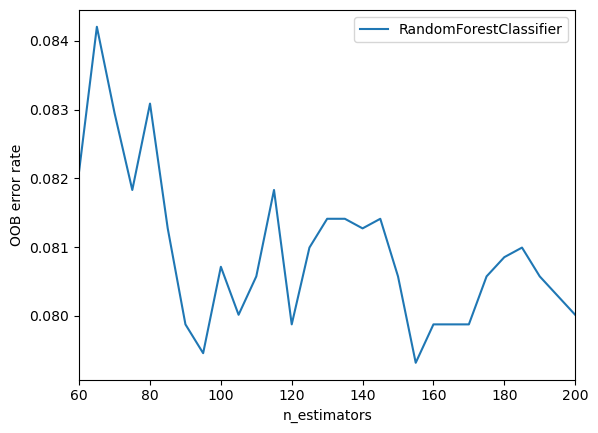

In [24]:
# #create a list named ensemble_clfs which store the tuple with 2 values which contains
# #1.randomclassifer's name
# #2.classifier and its paramters where max_depth =20, 10 trees, with all CPU (n_jobs=-1), warm start and oob_score set true. 


ensemble_clfs = [
    (
        "RandomForestClassifier",
        RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=10, n_jobs=-1,verbose=1,
            warm_start=True,
            oob_score=True,
            random_state=42,
        )),
]

# with the range of n_estimators between 60 to 200, calculate out of bags error.
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)


# Range of `n_estimators` values to explore.
min_estimators = 60
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


With the help of plot, identify where the no. of trees show similar error values and then 
create No. of trees somewhere between 110 to 135 since the error value is similar. 
calculate f1 Score for training and testing using the selected parameters 


In [25]:
# CREATE A RANDOM FOREST WITH No. OF TREES BETWEEN 110 to 135.
# CALCULATE f1 Score for training and testing 

from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Generate a random number of trees between 110 and 135
n_trees = np.random.randint(110, 136)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=n_trees, random_state=42)
rf_classifier.fit(X_train,y_train.values.ravel())

# Predict on training data
y_train_pred = rf_classifier.predict(X_train)

# Calculate F1 score for training data
f1 = f1_score(y_train, y_train_pred)

# Print the F1 scores
print(f"F1 Score Train: {round(f1, 2)}")

# Predict on validation data
y_test_pred = rf_classifier.predict(X_test)

# Calculate F1 score for validation data
f1 = f1_score(y_test, y_test_pred)

print(f"F1 Score Testing: {round(f1, 2)}")


F1 Score Train: 1.0
F1 Score Testing: 0.95


In Conclusion,
You can see the f1 scores computed using different algorithms and compare the performance of models.
However In all cases, the relatively high F1 scores indicate that bagging is an excellent approach for 
the classification problem. Monitor and validation on new data is always suggested to ensure continued model accuracy and relevance. 
